In [43]:
import random 
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
#sklearn --> K-Means
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 


# Test Part

In [44]:
np.random.seed(0)

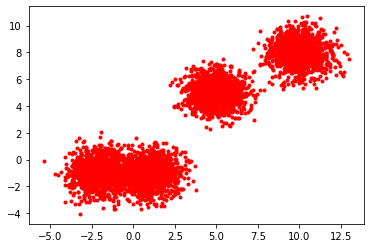

In [45]:
x,y = make_blobs(n_samples = 5000 , centers=[[5,5], [-2, -1], [10, 8], [1, -1]], cluster_std=0.9)
plt.scatter(x[:,0],x[:,1],marker='.',color = "r")

In [46]:
KmeansTest = KMeans(init = "k-means++",n_clusters=4,n_init=12)
KmeansTest.fit(x)

#Kmeans Clustring Lables
Labels = KmeansTest.labels_
print("Labels : ",Labels)

#Kmeans Clustring Centers
Centers = KmeansTest.cluster_centers_
print("Centers :\n",Centers)

Labels :  [3 1 1 ... 2 3 3]
Centers :
 [[ 1.00810858 -1.03197767]
 [10.0023548   7.98107755]
 [ 4.97199609  4.99464156]
 [-2.04200654 -0.9928294 ]]


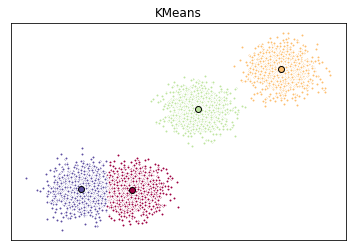

In [47]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
#this is for colors (cm --> color map)
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(Labels))))

for k, col in zip(range(len(Centers)), colors):
    
        equal_lables = (Labels == k) #sprate same Lables (numpy ...)
        clusterCenter = Centers[k]
        ax.plot(x[equal_lables, 0], x[equal_lables, 1], 'w', markerfacecolor=col, marker='.')
        ax.plot(clusterCenter[0], clusterCenter[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

# Data Set Part --> Kmeans Clustring

In [48]:
df = pd.read_csv("Cust_Segmentation.csv",encoding = "ISO-8859-1",low_memory=False)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [49]:
#lets drop (Remove) one unneccery axis
df = df.drop("Address",axis=1) #axis = 1 --> column , axis = 0 --> row
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [50]:
df = df.drop("Customer Id",axis=1) #axis = 1 --> column , axis = 0 --> row
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [51]:
XInputs = df
#replace Nan --> number
XInputs = np.nan_to_num(XInputs)
#normalize inputs
from sklearn.preprocessing import StandardScaler
ClusterDataSet =  StandardScaler().fit_transform(XInputs)

In [52]:
clusterNumber = 3
kmeans = KMeans(init = "k-means++", n_clusters = clusterNumber, n_init = 12)
kmeans.fit(XInputs)
labels = kmeans.labels_
print("Labels :\n",Labels)

Labels :
 [3 1 1 ... 2 3 3]


In [53]:
#Add Labels to data set
df["Clus_km"] = labels
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,2
2,33,2,10,57,6.111,5.802,1.0,20.9,1
3,29,2,4,19,0.681,0.516,0.0,6.3,1
4,47,1,31,253,9.308,8.908,0.0,7.2,0


In [54]:
df.groupby('Clus_km').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,
0,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
1,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
2,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


C:\Users\ABTIN\AppData\Local\Temp/ipykernel_3944/1732949402.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(XInputs[:, 0], XInputs[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)


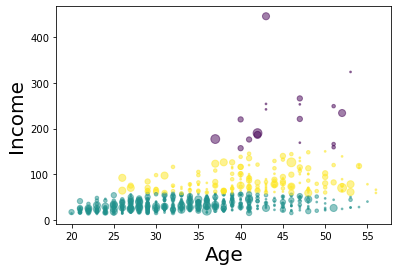

In [55]:
#compare Edu 
area = np.pi * ( XInputs[:, 1])**2  
#s --> Area of point
#c -- > like cm in km test section
plt.scatter(XInputs[:, 0], XInputs[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
#compare to var column
plt.xlabel('Age', fontsize=20)
plt.ylabel('Income', fontsize=20)
plt.show()